# The wave equation in 2D 

In [1]:
from fenics import *
import numpy as np
import matplotlib.pyplot as plt

Let us consider the wave equation in 2D

$$u_{tt} = 36(u_{xx} + u_{yy}),$$
 with initial conditions

$$u(x,y,0) = f(x,y)=xy(2-x)(3-y),$$
$$u_t(x,y,0) = g(x,y)=\sin(2\pi x),$$

and boundary conditions
$u|_{\partial \Omega}=0$ and $\Omega=[0,2]\times[0,3]$.

Numerical problem:
$$u_{tt}-\Delta u=f\,\, in\,\Omega\times(0,T]$$

$$u=0\,\, on\,\partial\Omega\times(0,T]$$
$$u(.,t)=u_0\,\, in\,\Omega$$
$$u_t(.,t)=g\,\, in\,\Omega$$

$$\frac{1}{(\Delta t)^2} \Big(u^{n+1}-2u^n+u^{n-1}\Big)-\frac{1}{2}\Delta(u^{n+1}+u^{n-1})= f(t^n)$$

with $u¹=u^0+g(x,y)\Delta t$.




Usaremos diferencias finitas para la segunda derivada temporal, es decir:
$$ u_{tt} \approx \frac{u^{k+2} - 2u^{k+1} + u^k}{dt^2} $$
Entonces la formula variacional esta dada por:
$$ \int_{\Omega} (u^{k+2} - 2u^{k+1} + u^k)v \, dx = \frac{36 dt^2}{2} \int_{\Omega} \Delta (u^{k+2} + u^{k})v \, dx $$
$$ \int_{\Omega} v u^{k+2} + 18 dt^2 (\nabla u^{k+2} \cdot \nabla v ) \, dx = \int_{\Omega} (2u^{k+1} - u^k)v - 18 dt^2 (\nabla u^{k} \cdot \nabla v ) \, dx$$

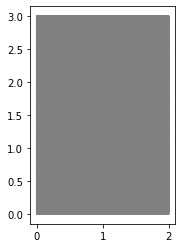

In [25]:
from mshr import *
# Define mesh and function space
domain = Rectangle(Point(0, 0), Point(2, 3))
mesh = generate_mesh(domain, 100)
plot(mesh)

In [26]:
fid = File("wave_eq/solution.pvd")

#Discretization
T = 3.0 # final time
num_steps = 100 # number of time steps
dt = T / num_steps # time step size
V = FunctionSpace(mesh, 'Lagrange', 1)

## Define the boundary condition
u_D = Constant(0.0)
def boundary(x, on_boundary):
    return on_boundary
bc = DirichletBC(V, u_D, boundary)

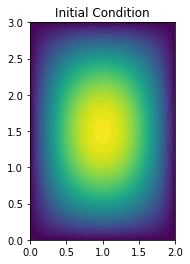

In [27]:
# The initial condition t=0. u(x,y,0) = xy(2-x)(3-y)
initial_condition = Expression("x[0]*x[1]*(2-x[0])*(3-x[1])",degree=3)
u_k = interpolate(initial_condition,V)
plt.figure()
plt.title('Initial Condition')
plot(u_k)

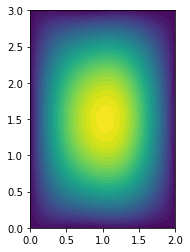

In [28]:
# u^1 = u^0 + g(x,y) * dt
u_k1 = Expression("x[0]*x[1]*(2-x[0])*(3-x[1]) + sin(2*pi*x[0])*dt",degree=3, dt=dt)
u_k1 = interpolate(u_k1,V)
plot(u_k1)

In [29]:
u_k2 = TrialFunction(V)
v = TestFunction(V)

a = (v*u_k2 + 18*dt*dt*inner(nabla_grad(u_k2),nabla_grad(v)))*dx
L = ((2*u_k1 - u_k)*v - 18*dt*dt*inner(nabla_grad(u_k),nabla_grad(v)))*dx

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solv

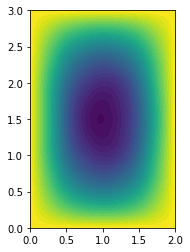

In [30]:
# Time-stepping
u = Function(V)
t = 0
while t <= T:
    # Update time
    t += dt
    # Solve variational problem at current time step
    solve(a == L, u, bc)
    # Plot solution
    plot(u)    
    # Update previous solution
    u_k.assign(u_k1)
    u_k1.assign(u)
    # Save solution through time to visualize in paraview
    fid << u, t

# Heat equation in 2D

Let us consider the heat equation in 2D

$$u_{t} = c^2\nabla^2u+f(x,y)=c^2(u_{xx} + u_{yy})+f(x,y,t),$$
with initial conditions
$$u(x,y,0) = xy(2-x)(3-y),$$

$$u(0,y,t) =u(a,y,t)=0,\,\, 0\leq y\leq b,t\geq 0$$
$$u(x,0,t) =u(x,b,t)=0,\,\, 0\leq x\leq b,t\geq 0$$
$\Omega=[0,2]\times[0,3]$.

and 
$$f(x,y,t)=xy(2 - x)(3 - y) - 2x(x - 2)(t + y(x - 2) + 2(x - 2)(y - 3)) - 2y(y - 3)(t + x(y - 3) + 2(x - 2)(y - 3))$$

Theta method

$$u_t-\Delta u=f\,\, in \, \Omega\times(0,T)$$

$$u=u_0 \,\, on\, \partial\Omega\times{0}$$

$$\frac{1}{\Delta t}\Big(u^{n+1}-u^n\Big)+\theta\Delta u^{n+1}-(1-\theta)\Delta u^n=\theta f(t_{n+1})+(1-\theta)f(t_{n})$$



$$u_{t} = c^2 \Delta u + f(x,y,t)$$
$$\frac{u^{n+1}-u^n}{dt} = c^2 (\theta\Delta u^{n+1}-(1-\theta)\Delta u^n) + (\theta f(t_{n+1})+(1-\theta)f(t_{n}))$$
Sea $\rho = dt c^2$, entonces la formula variacional esta dada por:
$$ \int_{\Omega} u^{n+1}v + \rho \theta (\nabla u^{n+1} \cdot \nabla v) \, dx = \int_{\Omega} \rho (1-\theta)(\nabla u^n \cdot \nabla v) + (u^n + dt \theta f(t^{n+1}) + dt(1-\theta)f(t^n))v \, dx $$

In [39]:
from mshr import *
# Define mesh and function space
domain = Rectangle(Point(0, 0), Point(2, 3))
mesh = generate_mesh(domain, 100)

fid = File("heat_eq_2d/solution.pvd")

#Discretization
T = 1.0 # final time
num_steps = 100 # number of time steps
dt = T / num_steps # time step size

V = FunctionSpace(mesh, 'Lagrange', 1)

## Define the boundary condition
u_D = Constant(0.0)
def boundary(x, on_boundary):
    return on_boundary
bc = DirichletBC(V, u_D, boundary)

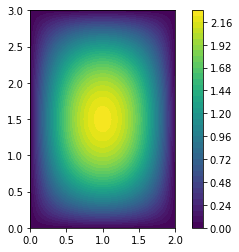

In [40]:
# The initial condition t=0. u(x,y,0) = xy(2-x)(3-y)
initial_condition = Expression("x[0]*x[1]*(2-x[0])*(3-x[1])",degree=3)
u_k_old = interpolate(initial_condition,V)
p = plot(u_k_old)
plt.colorbar(p)

Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational p

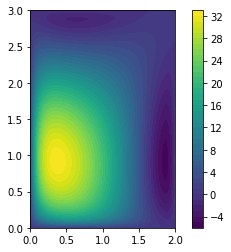

In [41]:
# Define the variational problem
u = TrialFunction(V)
v = TestFunction(V)
c = 1
theta = 0
exp = Expression('x[0]*x[1]*(2-x[0])*(3-x[1]) - 2*x[0]*(x[0]-2)*(t+x[1]*(x[0]-2)+2*(x[0]-2)*(x[1]-3)) - 2*x[1]*(x[1]-3)*(t+x[0]*(x[1]-3)+2*(x[0]-2)*(x[1]-3))',degree=3, t=0)
f_old = exp
f = exp
a = u*v*dx + dt*c*c*inner(nabla_grad(u), nabla_grad(v))*dx
L = (dt*c*c*(1-theta)*inner(nabla_grad(u_k_old), nabla_grad(v)) + (u_k_old + dt*theta*f + dt*(1-theta)*f_old)*v)*dx

# Time-stepping
u = Function(V)
t = 0
while t <= T:
    # Update time
    t += dt
    f_old.t = t
    f.t = t + dt
    # Solve variational problem at current time step
    solve(a == L, u, bc)
    # Plot solution
    p = plot(u)
    # Update previous solution
    u_k_old.assign(u)
    fid << u, t
plt.colorbar(p)